import

In [ ]:
# Uncomment next command if you need to install a missing module
#!pip install statsmodels
import requests
import matplotlib.pyplot as plt
import pandas as pd
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
    import statsmodels.api as sm
import numpy as np
%matplotlib inline

import seaborn as sns

from scipy import stats

data


In [ ]:
#data_path = "drive/MyDrive/Colab Notebooks/1624a1/data/clean_kaggle_data_2024.csv"

In [ ]:
df = pd.read_csv("clean_kaggle_data_2024.csv")

# display first 5 rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,ConvertedCompYearly
0,73,I am a developer by profession,18-24,"Employed, full-time;Student, full-time;Indepen...",Hybrid,Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,10.0,75.0,65.0,100.0,100.0,100.0,50.0,90.0,10,7322
1,380,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,91295
2,390,I am a developer by profession,25-34,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,0.0,0.0,20.0,30.0,5.0,20.0,10.0,5.0,10,110000
3,393,I am a developer by profession,35-44,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects,Professional degree,Books / Physical media,NaN,...,0.0,10.0,30.0,5.0,10.0,0.0,0.0,5.0,7,161044
4,399,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,30.0,10.0,30.0,0.0,0.0,0.0,5,195000


In [ ]:
df.describe()

,ResponseId,YearsCode,YearsCodePro,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,ConvertedCompYearly
count,12209.000000,12209.000000,12209.000000,1.220900e+04,12166.000000,12134.000000,12160.000000,12172.000000,12188.000000,12189.000000,12191.000000,12186.000000,12190.000000,12186.000000,12209.000000,1.220900e+04
mean,20297.735687,14.303956,9.632075,3.049833e+07,10.765823,19.770026,7.655859,10.775776,25.621767,24.822451,21.672570,17.354325,12.038331,10.855449,6.940126,8.432007e+04
std,11633.678037,9.214786,7.988643,6.564029e+08,8.637580,26.232043,18.502650,22.464719,27.206669,27.316410,26.614071,25.482397,23.802943,22.517018,2.083906,1.861754e+05
min,73.000000,0.000000,0.000000,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000e+02
25%,10146.000000,8.000000,4.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.040400e+04
50%,20167.000000,12.000000,7.000000,1.200000e+05,8.000000,10.000000,0.000000,0.000000,20.000000,20.000000,12.000000,10.000000,0.000000,0.000000,7.000000,6.444400e+04
75%,29948.000000,19.000000,13.000000,3.360000e+05,15.000000,25.000000,5.000000,10.000000,30.000000,30.000000,30.000000,20.000000,10.000000,10.000000,8.000000,1.074060e+05
max,41187.000000,50.000000,50.000000,4.800000e+10,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,10.000000,1.381802e+07


In [ ]:
df.shape

(12209, 112)

In [ ]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'JobSat', 'ConvertedCompYearly'],
      dtype='object', length=112)

# EDA

## `DevType` v.s `ConvertedCompyYearly`

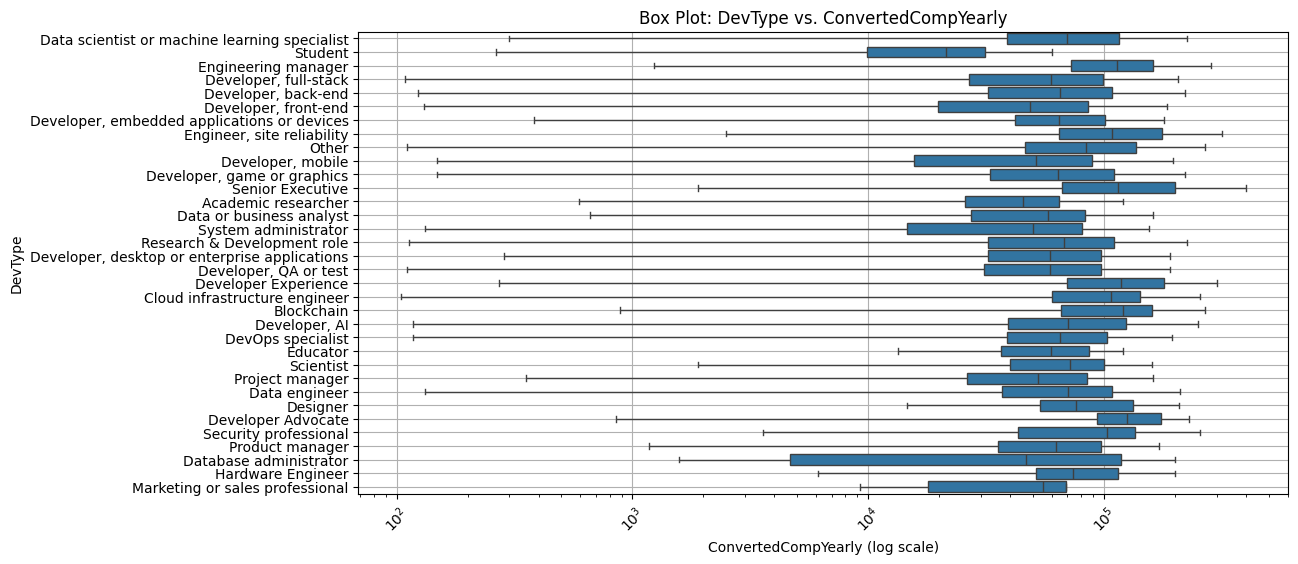

In [ ]:
### 1. Box Plot: DevType vs. ConvertedCompYearly ###
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="ConvertedCompYearly", y="DevType", showfliers=False)
plt.xscale("log")
plt.title("Box Plot: DevType vs. ConvertedCompYearly")
plt.xlabel("ConvertedCompYearly (log scale)")
plt.ylabel("DevType")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## `PlatformHaveWorkedWith` by Senior Executive

In [ ]:
df_senior_executive = df[df["DevType"].str.contains("Senior Executive", na=False)]

def prepare_pie_data(counts):
    top_5 = counts.nlargest(5)
    others = counts.iloc[5:].sum()
    pie_data = pd.concat([top_5, pd.Series(others, index=["Others"])])
    return pie_data

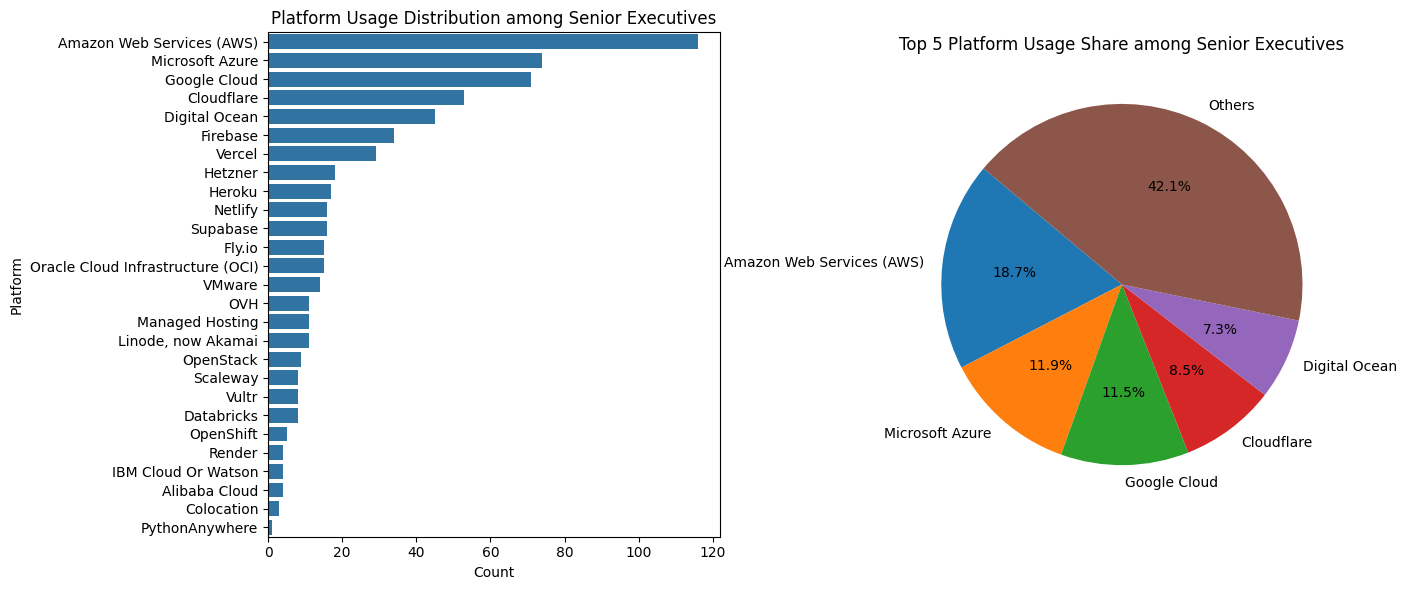

In [ ]:
df_platforms = df_senior_executive["PlatformHaveWorkedWith"].str.get_dummies(";")
platform_counts = df_platforms.sum().sort_values(ascending=False)


platform_pie_data = prepare_pie_data(platform_counts)

# Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Bar plot for Platform usage
sns.barplot(x=platform_counts.values, y=platform_counts.index, ax=axes[0])
axes[0].set_title("Platform Usage Distribution among Senior Executives")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Platform")
# Pie chart for Platform usage (Top 5 + Others)
axes[1].pie(platform_pie_data, labels=platform_pie_data.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Top 5 Platform Usage Share among Senior Executives")

plt.tight_layout()
plt.show()

## `WebframeHaveWorkedWith` by Senior Executive



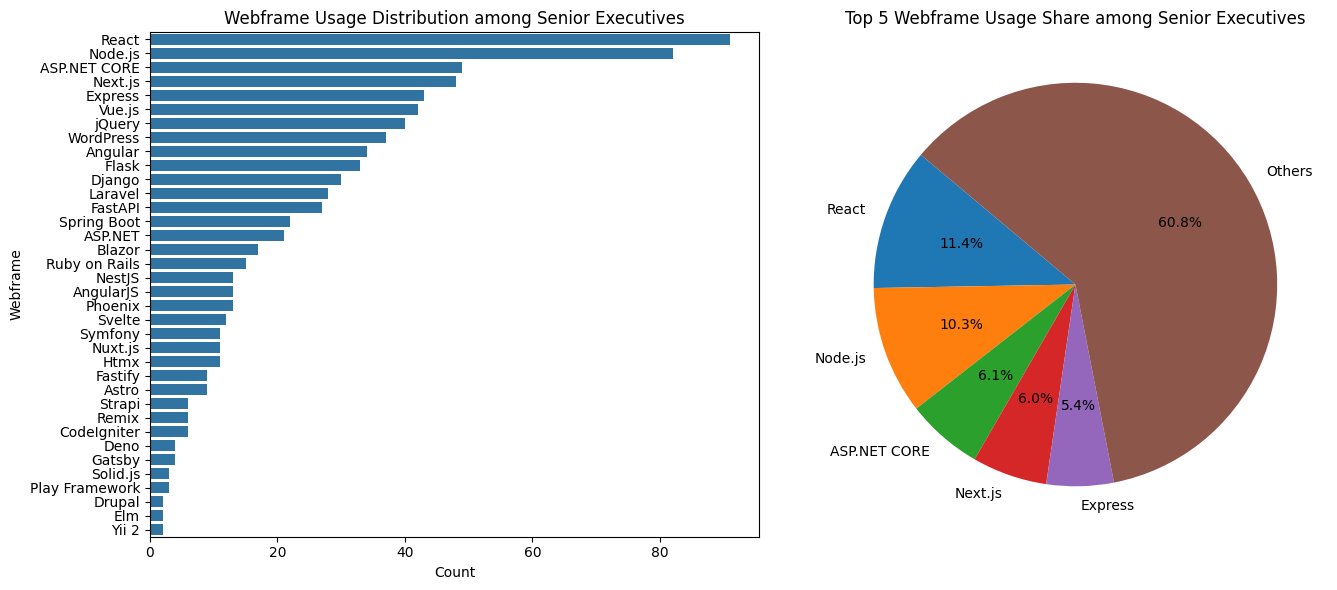

In [ ]:
# Filter dataset for only Senior Executives
df_senior_executive = df[df["DevType"].str.contains("Senior Executive", na=False)]

# Process "WebframeHaveWorkedWith" column
# Since values can be multiple, separated by ';', we use get_dummies to count each separately
df_webframes = df_senior_executive["WebframeHaveWorkedWith"].str.get_dummies(";")

# Sum occurrences for each category
webframe_counts = df_webframes.sum().sort_values(ascending=False)

# Prepare data for pie chart
webframe_pie_data = prepare_pie_data(webframe_counts)

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Webframe usage
sns.barplot(x=webframe_counts.values, y=webframe_counts.index, ax=axes[0])
axes[0].set_title("Webframe Usage Distribution among Senior Executives")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Webframe")

# Pie chart for Webframe usage (Top 5 + Others)
axes[1].pie(webframe_pie_data, labels=webframe_pie_data.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Top 5 Webframe Usage Share among Senior Executives")

plt.tight_layout()
plt.show()

# Estimating Salary Differences Between Hybrid and Remote Job Modes

## descriptive statistics

In [ ]:
# Filter dataset for RemoteWork column (Hybrid and Remote jobs only)
df_remote_hybrid = df[df["RemoteWork"].isin(["Hybrid", "Remote"])]

# Remove outliers using IQR method
Q1 = df_remote_hybrid["ConvertedCompYearly"].quantile(0.25)
Q3 = df_remote_hybrid["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_remote_hybrid[(df_remote_hybrid["ConvertedCompYearly"] >= lower_bound) &
                               (df_remote_hybrid["ConvertedCompYearly"] <= upper_bound)]

# Compute descriptive statistics for Hybrid and Remote job modes
stats_hybrid = df_filtered[df_filtered["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"].describe()
stats_remote = df_filtered[df_filtered["RemoteWork"] == "Remote"]["ConvertedCompYearly"].describe()

# Create a DataFrame for easier comparison
stats_summary = pd.DataFrame({"Hybrid": stats_hybrid, "Remote": stats_remote})

stats_summary

,Hybrid,Remote
count,5117.000000,4758.000000
mean,70739.728943,79718.849727
std,47701.045669,56498.004921
min,109.000000,104.000000
25%,35872.000000,33848.000000
50%,63799.000000,70563.500000
75%,96666.000000,118147.000000
max,225861.000000,226000.000000


N/A:
Filter data to keep rows with values "Hybrid" or "Remote" in the column `RemoteWork`


Removing Outliers (IQR Method):
- The IQR method was used to filter out extreme salary values beyond 1.5 times the interquartile range (below Q1 and above Q3).
- Rationale: Salaries often have extreme outliers due to highly paid executives or very low salaries that may not reflect actual full-time earnings. Keeping only typical salary ranges improves the reliability of the comparison.

## two-sample t-test

### Assumptions check

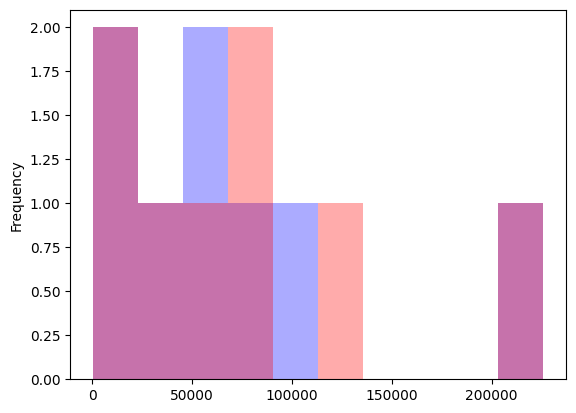

In [ ]:
# test normality: visulization
stats_hybrid.plot(kind='hist', color='blue', alpha=0.33)
stats_remote.plot(kind='hist', color='red', alpha=0.33)
plt.show()

In [ ]:
# test normality: shapiro test
# true: not normally distributed
_, p1 = stats.shapiro(df_filtered[df_filtered["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"])
_, p2 = stats.shapiro(df_filtered[df_filtered["RemoteWork"] == "Remote"]["ConvertedCompYearly"])
print(p1<0.05)
print(p2<0.05)

True
True


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5117.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# test variance leneve
_, p1 = stats.levene(df_filtered[df_filtered["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"],
                     df_filtered[df_filtered["RemoteWork"] == "Remote"]["ConvertedCompYearly"])
print(p1<0.05)

True


### manually computed t w/ pooled SE

In [ ]:
# Extract salary data for Hybrid and Remote job modes
salaries_hybrid = df_filtered[df_filtered["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"]
salaries_remote = df_filtered[df_filtered["RemoteWork"] == "Remote"]["ConvertedCompYearly"]

# Step 1: Compute sample means
mean_hybrid = np.mean(salaries_hybrid)
mean_remote = np.mean(salaries_remote)

# Step 2: Compute sample variances
var_hybrid = np.var(salaries_hybrid, ddof=1)  # ddof=1 aka /(n-1) for sample variance
var_remote = np.var(salaries_remote, ddof=1)

# Step 3: Compute sample sizes
n_hybrid = len(salaries_hybrid)
n_remote = len(salaries_remote)

# Step 4: Compute pooled standard deviation (assuming equal variances)
pooled_std = np.sqrt(((n_hybrid - 1) * var_hybrid + (n_remote - 1) * var_remote) / (n_hybrid + n_remote - 2))

# Step 5: Compute standard error of the difference in means
se_diff = pooled_std * np.sqrt(1/n_hybrid + 1/n_remote)

# Step 6: Compute t-statistic manually
t_stat_manual = (mean_hybrid - mean_remote) / se_diff


### built in t

In [ ]:
# Step 7: Compute t-statistic using built-in function
tc,pc = stats.ttest_ind(salaries_hybrid, salaries_remote, equal_var=True)
tc_,pc_ = stats.ttest_ind(salaries_hybrid, salaries_remote, equal_var=False) # default

In [ ]:
t1,p1 = stats.ttest_ind(salaries_remote, salaries_hybrid, equal_var=True)
# t2,p2 = stats.ttest_ind(salaries_hybrid, salaries_remote, equal_var=False)

### compare

In [ ]:
print("t_manual: t = %g" %(t_stat_manual))
print ("t_builtin (equal var): t = %g  p = %g" % (tc, pc))
print ("t_builtin (NOT equal var): t = %g  p = %g" % (tc_, pc_))

t_manual: t = -8.55337
t_builtin (equal var): t = -8.55337  p = 1.37315e-17
t_builtin (NOT equal var): t = -8.50139  p = 2.16131e-17


## Bootstrap

In [ ]:
# Bootstrap function to resample data
def bootstrap_mean(sample, sample_size, n_bootstrap=10000):
    np.random.seed(42)
    bootstrap_means = np.array([np.mean(np.random.choice(sample, size=sample_size, replace=True)) for _ in range(n_bootstrap)])
    return bootstrap_means

# Sample sizes for bootstrapping should match the relative sizes of the original dataset
n_hybrid = len(salaries_hybrid)
n_remote = len(salaries_remote)

# Bootstrap distributions
bootstrap_hybrid = bootstrap_mean(salaries_hybrid, n_hybrid, 10000)
bootstrap_remote = bootstrap_mean(salaries_remote, n_remote, 10000)

# Compute difference in means
bootstrap_diff = bootstrap_hybrid - bootstrap_remote

# Standardized differences (z-scores)
bootstrap_diff_standardized = (bootstrap_diff - np.mean(bootstrap_diff)) / np.std(bootstrap_diff)

### plot1

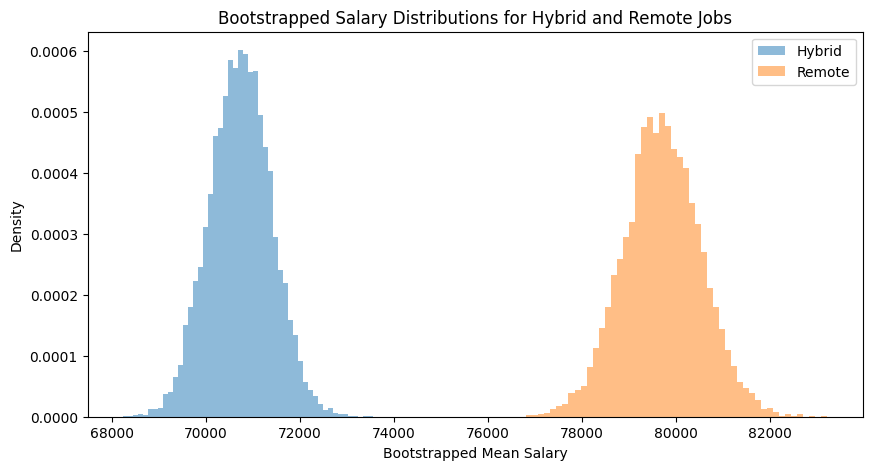

In [ ]:

# Plot 1: Bootstrapped distributions for Hybrid and Remote salaries
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_hybrid, bins=50, alpha=0.5, label="Hybrid", density=True)
plt.hist(bootstrap_remote, bins=50, alpha=0.5, label="Remote", density=True)
plt.title("Bootstrapped Salary Distributions for Hybrid and Remote Jobs")
plt.xlabel("Bootstrapped Mean Salary")
plt.ylabel("Density")
plt.legend()
plt.show()


### plot2

<ipython-input-21-07c46e7f462f>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


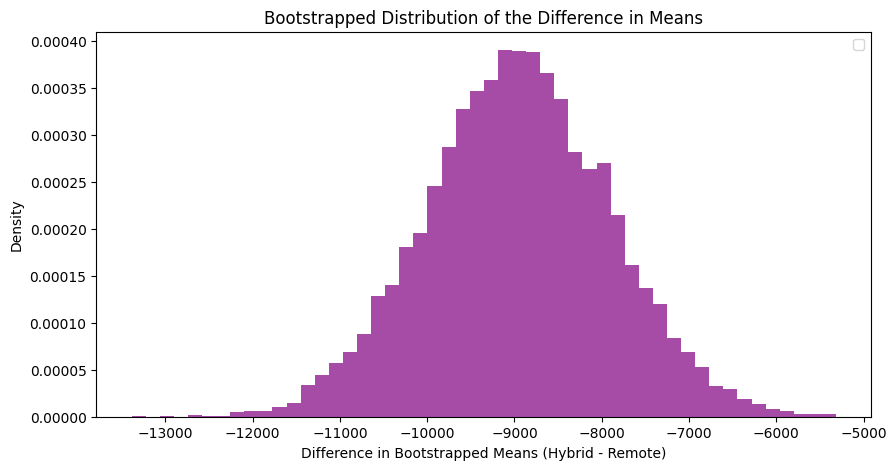

In [ ]:
# Plot 2: Distribution of the difference in means
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_diff, bins=50, color='purple', alpha=0.7, density=True)
plt.title("Bootstrapped Distribution of the Difference in Means")
plt.xlabel("Difference in Bootstrapped Means (Hybrid - Remote)")
plt.ylabel("Density")
plt.legend()
plt.show()


### plot3

<ipython-input-22-90e1b4d03303>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


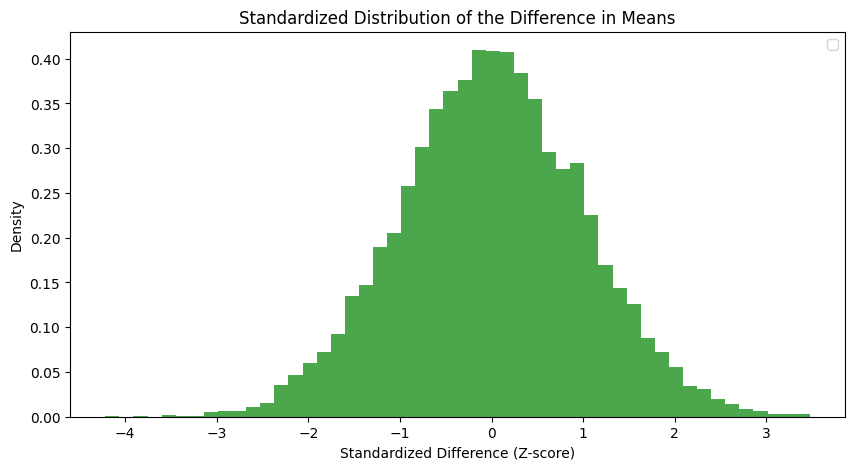

In [ ]:
# Plot 3: Standardized distribution of the difference in means
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_diff_standardized, bins=50, color='green', alpha=0.7, density=True)
plt.title("Standardized Distribution of the Difference in Means")
plt.xlabel("Standardized Difference (Z-score)")
plt.ylabel("Density")
plt.legend()
plt.show()

## t-test w/ bootstrap

In [ ]:
# Compute t-test using bootstrapped data
t_stat_bootstrap, p_value_bootstrap = stats.ttest_ind(bootstrap_hybrid, bootstrap_remote, equal_var=False)
print ("bootstrapped t-test (assume NOT equal var): t = %g  p = %g" % (t_stat_bootstrap, p_value_bootstrap))
print ("previous t-test (assume NOT equal var): t = %g  p = %g" % (tc, pc))

bootstrapped t-test (assume NOT equal var): t = -846.663  p = 0
previous t-test (assume NOT equal var): t = -8.55337  p = 1.37315e-17


## CI

In [ ]:
# observed_diff = np.array(salaries_hybrid) - np.array(salaries_remote)
# pt_est = np.mean(observed_diff)
# se = np.std(observed_diff, ddof=1)

# print(observed_diff)
# print(pt_est)
# print(se)

# lower_se = stats.norm.ppf(0.025, loc=pt_est, scale=se)
# upper_se = stats.norm.ppf(0.975, loc=pt_est, scale=se)

# print((lower_se, upper_se))

In [ ]:
# Compute degrees of freedom
df = n_hybrid + n_remote - 2

# Compute t-critical value for 95% CI
t_critical = stats.t.ppf(1 - 0.025, df)

# Compute margin of error
margin_of_error = t_critical * se_diff

# Compute 95% CI for the difference in means
CI_formula = (mean_hybrid - mean_remote) + np.array([-margin_of_error, margin_of_error])

In [ ]:
# Compute the 95% CI using bootstrap
bootstrap_diff = bootstrap_hybrid - bootstrap_remote
CI_bootstrap = np.percentile(bootstrap_diff, [2.5, 97.5])

In [ ]:
print("Formula-Based 95% CI for the difference in means: ", CI_formula)
print("Bootstrap-Based 95% CI for the difference in means: ", CI_bootstrap)

Formula-Based 95% CI for the difference in means:  [-11036.89693602  -6921.34463205]
Bootstrap-Based 95% CI for the difference in means:  [-11024.86897858  -6879.95898405]


## median test

### Mood's test

In [ ]:
t_moods = stats.median_test(salaries_hybrid, salaries_remote).pvalue

### bootstrapped median

In [ ]:
# Bootstrap for median difference
num_bootstraps = 10000
bootstrap_medians_hybrid = np.array([np.median(np.random.choice(salaries_hybrid, size=n_hybrid, replace=True)) for _ in range(num_bootstraps)])
bootstrap_medians_remote = np.array([np.median(np.random.choice(salaries_remote, size=n_remote, replace=True)) for _ in range(num_bootstraps)])


# Compute the observed difference in medians
observed_median_diff = np.median(salaries_hybrid) - np.median(salaries_remote)

# Compute bootstrapped median differences
bootstrap_median_diff = bootstrap_medians_hybrid - bootstrap_medians_remote

# p = 2 \times \min(P(Diff \leq 0), P(Diff \geq 0))
p_value_median_bootstrap = 2 * min(np.mean(bootstrap_median_diff <= 0), np.mean(bootstrap_median_diff >= 0))

# Display results
p_value_median_bootstrap


0.0

In [ ]:
print(f"original p-value with mood's: %g" % (t_moods))
print(f"bootstrapped p-value: {p_value_median_bootstrap}")

original p-value with mood's: 1.14501e-08
bootstrapped p-value: 0.0


### discuss mood's test vs bootstrapped median differences
- Both Mood’s Median Test and Two-sided Test has a very small p-value, which suggests a statistically significant difference between the medians.

# ANOVA

## describe

In [ ]:
# Filter dataset for North American participants (US and Canada)
df_na = df_filtered[df_filtered['Country'].isin(['United States', 'Canada'])]

# Group by Education Level and compute descriptive statistics for salary
education_groups = df_na.groupby('EdLevel')['ConvertedCompYearly'].describe()

print(education_groups)

                                                    count           mean  \
EdLevel                                                                    
Associate degree                                     36.0   95137.027778   
Bachelor’s degree                                   178.0   97633.730337   
Master’s degree                                      81.0  107661.679012   
Primary/elementary school                             1.0   58154.000000   
Professional degree                                  14.0  100151.357143   
Secondary school                                     12.0   81254.666667   
Some college/university study without earning a...   49.0   92068.938776   
Something else                                        7.0   76836.571429   

                                                             std      min  \
EdLevel                                                                     
Associate degree                                    43779.129628  25443.0   
Bachelor

## ANOVA: mean salaries: Bachelor’s degree, Master’s degree, Professional

## assumption
- normality:  not nomal as shown visually below
- equal var - levene: not equal, by pair-wise levene below

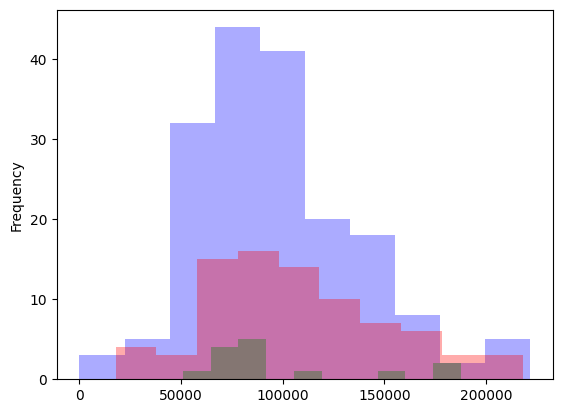

In [ ]:
# plot distribution for B, M, P salaries
df_na_bachelor = df_na[df_na['EdLevel'] == 'Bachelor’s degree']['ConvertedCompYearly']
df_na_master = df_na[df_na['EdLevel'] == 'Master’s degree']['ConvertedCompYearly']
df_na_professional = df_na[df_na['EdLevel'] == 'Professional degree']['ConvertedCompYearly']

df_na_bachelor.plot(kind='hist', color='blue', alpha=0.33)
df_na_master.plot(kind='hist', color='red', alpha=0.33)
df_na_professional.plot(kind='hist', color='green', alpha=0.33)
plt.show()

In [ ]:
# pair-wise levene test
# all false indicate equal VAR
_, p1 = stats.levene(df_na_bachelor, df_na_master)
_, p2 = stats.levene(df_na_bachelor, df_na_professional)
_, p3 = stats.levene(df_na_master, df_na_professional)
print(p1<0.05)
print(p2<0.05)
print(p3<0.05)

False
False
False


### test on original data

In [ ]:
# Perform ANOVA to compare mean salaries across education levels
f_stat, p_value_anova = stats.f_oneway(
    df_na[df_na['EdLevel'] == 'Bachelor’s degree']['ConvertedCompYearly'],
    df_na[df_na['EdLevel'] == 'Master’s degree']['ConvertedCompYearly'],
    df_na[df_na['EdLevel'] == 'Professional degree']['ConvertedCompYearly']
)

print(f"ANOVA p-value: %g" %(p_value_anova))

ANOVA p-value: 0.197096


## bootstrap

In [ ]:
salaries_bachelor = df_na[df_na['EdLevel'] == "Bachelor’s degree"]['ConvertedCompYearly']
salaries_master = df_na[df_na['EdLevel'] == "Master’s degree"]['ConvertedCompYearly']
salaries_professional = df_na[df_na['EdLevel'] == "Professional degree"]['ConvertedCompYearly']

n_bachelor = len(salaries_bachelor)
n_master = len(salaries_master)
n_professional = len(salaries_professional)

In [ ]:
# Function to bootstrap the data for a given group
def bootstrap_mean(sample, sample_size, n_bootstrap=10000):
    np.random.seed(42)
    bootstrap_means = np.array([np.mean(np.random.choice(sample, size=sample_size, replace=True)) for _ in range(n_bootstrap)])
    return bootstrap_means

# Perform bootstrapping for each education group
bootstrap_bachelor = bootstrap_mean(salaries_bachelor, n_bachelor, 10000)
bootstrap_master = bootstrap_mean(salaries_master, n_master, 10000)
bootstrap_professional = bootstrap_mean(salaries_professional, n_professional, 10000)


### plot mean distribution

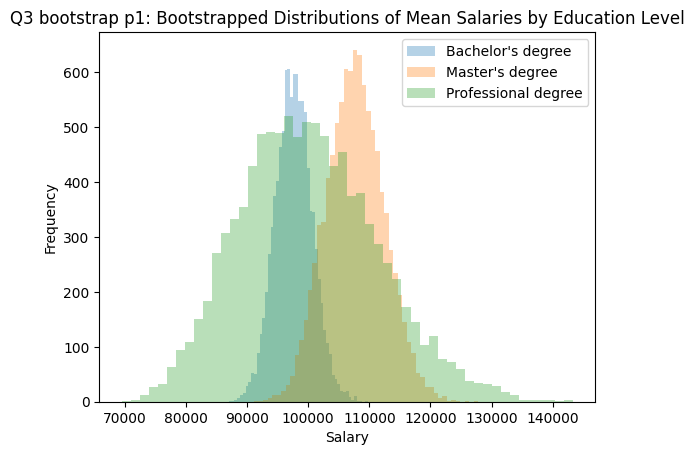

In [ ]:
# plot distribution for B, M, P salaries
plt.hist(bootstrap_bachelor, bins=50, alpha=0.33, label="Bachelor's degree")
plt.hist(bootstrap_master, bins=50, alpha=0.33, label="Master's degree")
plt.hist(bootstrap_professional, bins=50, alpha=0.33, label="Professional degree")

plt.legend()
plt.title("Q3 bootstrap p1: Bootstrapped Distributions of Mean Salaries by Education Level")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

### plot mean difference distribution

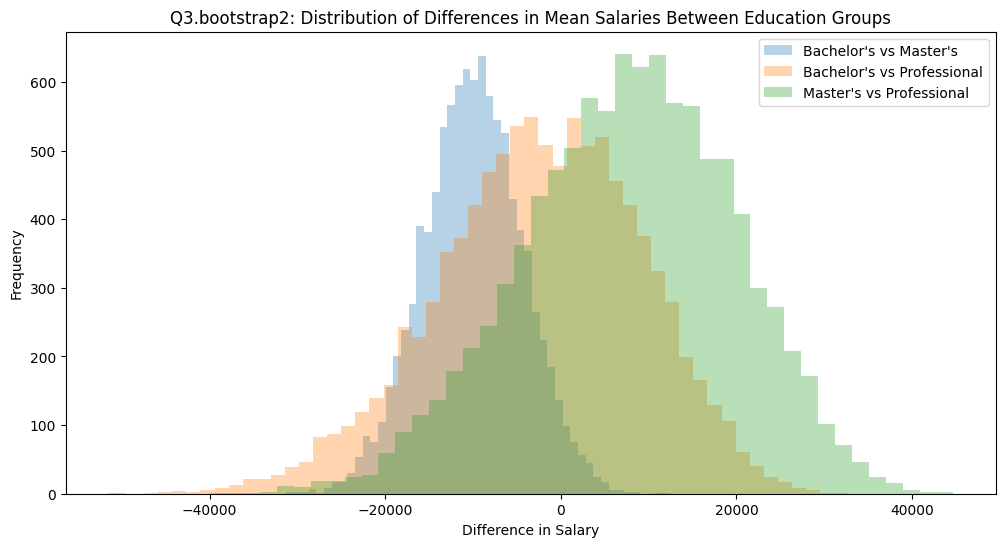

In [ ]:

# Compute the differences in means between groups
bachelor_vs_master_diff = bootstrap_bachelor - bootstrap_master
bachelor_vs_professional_diff = bootstrap_bachelor - bootstrap_professional
master_vs_professional_diff = bootstrap_master - bootstrap_professional

# Plot the distributions of differences in means between pairs of groups in a single plot
plt.figure(figsize=(12, 6))

# Plot histograms
plt.hist(bachelor_vs_master_diff, bins=50,alpha=0.33, label="Bachelor's vs Master's")
plt.hist(bachelor_vs_professional_diff, bins=50,alpha=0.33, label="Bachelor's vs Professional")
plt.hist(master_vs_professional_diff, bins=50,alpha=0.33, label="Master's vs Professional")

plt.legend()
plt.title("Q3.bootstrap2: Distribution of Differences in Mean Salaries Between Education Groups")
plt.xlabel("Difference in Salary")
plt.ylabel("Frequency")
plt.show()




### plot standard mean diff distribution

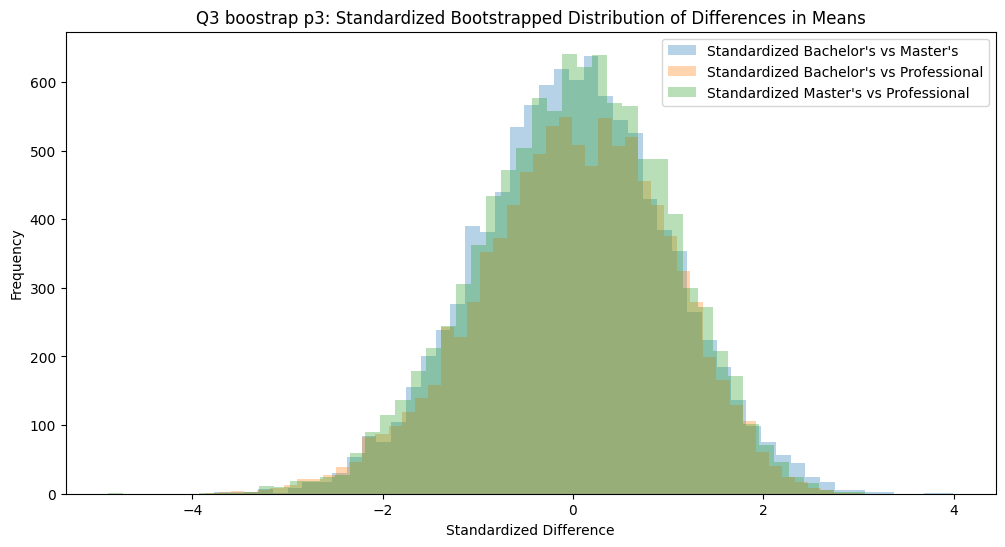

In [ ]:
# Compute the standardized distributions of the differences
def standardize_distribution(bootstrap_diff):
    mean_diff = np.mean(bootstrap_diff)
    std_diff = np.std(bootstrap_diff)
    return (bootstrap_diff - mean_diff) / std_diff

# Standardized distributions for differences
std_bachelor_vs_master = standardize_distribution(bachelor_vs_master_diff)
std_bachelor_vs_professional = standardize_distribution(bachelor_vs_professional_diff)
std_master_vs_professional = standardize_distribution(master_vs_professional_diff)


# Plot the standardized distributions
plt.figure(figsize=(12, 6))

plt.hist(std_bachelor_vs_master, bins=50,alpha=0.33, label="Standardized Bachelor's vs Master's")
plt.hist(std_bachelor_vs_professional, bins=50,alpha=0.33, label="Standardized Bachelor's vs Professional")
plt.hist(std_master_vs_professional, bins=50,alpha=0.33, label="Standardized Master's vs Professional")


plt.legend()
plt.title("Q3 boostrap p3: Standardized Bootstrapped Distribution of Differences in Means")
plt.xlabel("Standardized Difference")
plt.ylabel("Frequency")
plt.show()

## ANOVA w/ bootstrapepd

In [ ]:
# Perform ANOVA to compare mean salaries across education levels using bootstrapped data
f_stat_bootstrap, p_value_bootstrap = stats.f_oneway(
    bootstrap_bachelor,
    bootstrap_master,
    bootstrap_professional
)
print(f"bootstrapped ANOVA p-value: %g" %(p_value_bootstrap))
print(f"ANOVA p-value: %g" %(p_value_anova))


bootstrapped ANOVA p-value: 0
ANOVA p-value: 0.197096
